In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("C:\\Users\\Admin\\Downloads\\fraud_det\\fraudTest.csv")
df_test = pd.read_csv("C:\\Users\\Admin\\Downloads\\fraud_det\\fraudTrain.csv")

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

In [5]:
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

In [6]:
df_train['hourEnc'] = 0
df_train.loc[df_train.hour < 5,'hourEnc'] = 1
df_train.loc[df_train.hour > 21,'hourEnc'] = 1

df_test['hourEnc'] = 0
df_test.loc[df_test.hour < 5,'hourEnc'] = 1
df_test.loc[df_test.hour > 21,'hourEnc'] = 1

In [7]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
hourEnc                  0
dtype: int64

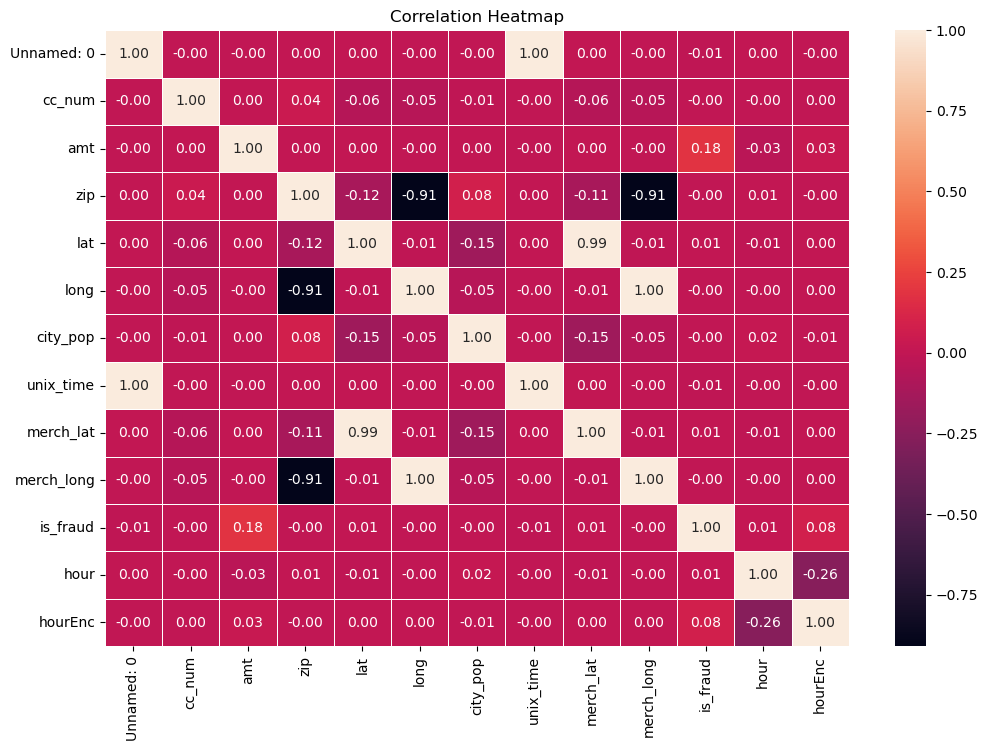

In [9]:
numeric_data = df_train.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
numeric_columns = df_train.select_dtypes(include='number')
fraud_correlation = numeric_columns.corr()['is_fraud'].abs().sort_values(ascending=False)

print(fraud_correlation)

is_fraud      1.000000
amt           0.182267
hourEnc       0.082021
Unnamed: 0    0.013892
unix_time     0.013066
hour          0.011686
lat           0.005863
merch_lat     0.005812
city_pop      0.004910
zip           0.002271
cc_num        0.001540
merch_long    0.001060
long          0.000972
Name: is_fraud, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


numeric_columns_train = df_train.select_dtypes(include='number')
numeric_columns_test = df_test.select_dtypes(include='number')

X_train = numeric_columns_train.drop(['is_fraud'], axis=1)
y_train = df_train['is_fraud']

X_test = numeric_columns_test.drop(['is_fraud'], axis=1)
y_test = df_test['is_fraud']

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Build and train the Logistic Regression model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9945946362812579
Confusion Matrix:
[[1289053     116]
 [   6893     613]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.84      0.08      0.15      7506

    accuracy                           0.99   1296675
   macro avg       0.92      0.54      0.57   1296675
weighted avg       0.99      0.99      0.99   1296675



In [ ]:
#logistic regression - 99.42
#random forests - 99.45
#decision trees - 95.93